In [103]:
import pandas as pd

import numpy as np

tape = pd.read_csv('04 April 2019 - Loan Tape.csv')
tp = tape.copy()

rate = tape['Borrower Rate']
la = tape['Loan Amount']
fa = tape['Funded Amount']
arv = tape['ARV']
ltv = tape['LTV']
loans = tape['Loan']

rate = rate.astype('float64')/100

la = la.str.strip('$')

la = la.str.replace(',', '')

la = la.astype('float64')

tape['weight'] = la / la.sum()

fa = fa.str.strip('$')

fa = fa.str.replace(',', '')

fa = fa.astype('float64')

arv = arv.str.strip('$')

arv = arv.str.replace(',', '')

arv = arv.astype('float64')

ltv = ltv.str.rstrip('%')

ltv = ltv.astype('float64') / 100

weight = tape['weight']

reo_rate = rate[tape['Substatus'] == 'REO']
reo_la = la[tape['Substatus'] == 'REO']
reo_fa = fa[tape['Substatus'] == 'REO']
reo_arv = arv[tape['Substatus'] == 'REO']
reo_ltv = ltv[tape['Substatus'] == 'REO']
reo_loans = loans[tape['Substatus'] == 'REO']

tape['reo_weight'] = reo_la / reo_la.sum()

reo_weight = tape['reo_weight']

nreo_rate = rate[(tape['Substatus'] != 'REO') & (tape['Substatus'] != 'Foreclosure')]
nreo_la = la[(tape['Substatus'] != 'REO') & (tape['Substatus'] != 'Foreclosure')]
nreo_fa = fa[(tape['Substatus'] != 'REO') & (tape['Substatus'] != 'Foreclosure')]
nreo_arv = arv[(tape['Substatus'] != 'REO') & (tape['Substatus'] != 'Foreclosure')]
nreo_ltv = ltv[(tape['Substatus'] != 'REO') & (tape['Substatus'] != 'Foreclosure')]
nreo_loans = loans[(tape['Substatus'] != 'REO') & (tape['Substatus'] != 'Foreclosure')]

tape['nreo_weight'] = nreo_la / nreo_la.sum()

nreo_weight = tape['nreo_weight']

fc_rate = rate[tape['Substatus'] == 'Foreclosure']
fc_la = la[tape['Substatus'] == 'Foreclosure']
fc_fa = fa[tape['Substatus'] == 'Foreclosure']
fc_arv = arv[tape['Substatus'] == 'Foreclosure']
fc_ltv = ltv[tape['Substatus'] == 'Foreclosure']
fc_loans = loans[tape['Substatus'] == 'Foreclosure']

tape['fc_weight'] = fc_la / fc_la.sum()

fc_weight = tape['fc_weight']

weighted_ltv = ltv * weight

weighted_reo_ltv = reo_ltv * reo_weight

weighted_nreo_ltv = nreo_ltv * nreo_weight

weighted_fc_ltv = fc_ltv * fc_weight

wa_ltv = weighted_ltv.sum()

wa_reo_ltv = weighted_reo_ltv.sum()

wa_nreo_ltv = weighted_nreo_ltv.sum()

wa_fc_ltv = weighted_fc_ltv.sum()

ha_ltv = la.sum() / arv.sum()

ha_reo_ltv = reo_la.sum() / reo_arv.sum()

ha_nreo_ltv = nreo_la.sum() / nreo_arv.sum()

ha_fc_ltv = fc_la.sum() / fc_arv.sum()

total_per = loans.count() / loans.count()

nreo_per = nreo_loans.count() / loans.count()

reo_per = reo_loans.count() / loans.count()

fc_per = fc_loans.count() / loans.count()

In [113]:
tape3 = pd.concat([nreo_loans, nreo_la, nreo_arv, nreo_ltv], axis=1).set_index('Loan')

hilo = tape3[(tape3.LTV > .7) | (tape3.LTV <= .5)] 

display(hilo)

,Loan Amount,ARV,LTV
Loan,,,
ST CHARLES 2414 2,920000.0,1266000.0,0.7267
MAJESTIC 1100,25000.0,50000.0,0.5000
MAJESTIC 1101,25000.0,50000.0,0.5000
ADELE 1026,318000.0,1030000.0,0.3087
LARKIN ARABELLE,146000.0,424000.0,0.3443
ELLA 2209,472500.0,630030.0,0.7500
REED PARK 17727,250000.0,703720.0,0.3553
W DARLEEN 10815,297000.0,625000.0,0.4752
FONTANA 3103,1243300.0,1555000.0,0.7995


In [94]:
from scipy.stats import gmean
import matplotlib.pyplot as plt
import seaborn as sns

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

x_r, y_r = ecdf(tape3.LTV)

tape3['avg_ltv'] = tape3.LTV.mean()
tape3['med_ltv'] = tape3.LTV.median()
tape3['gmean_ltv'] = gmean(tape3.LTV)
tape3['hmean_ltv'] = tape3['Loan Amount'].sum() / tape3['ARV'].sum()
tape3['x'] = x_r
tape3['y'] = y_r

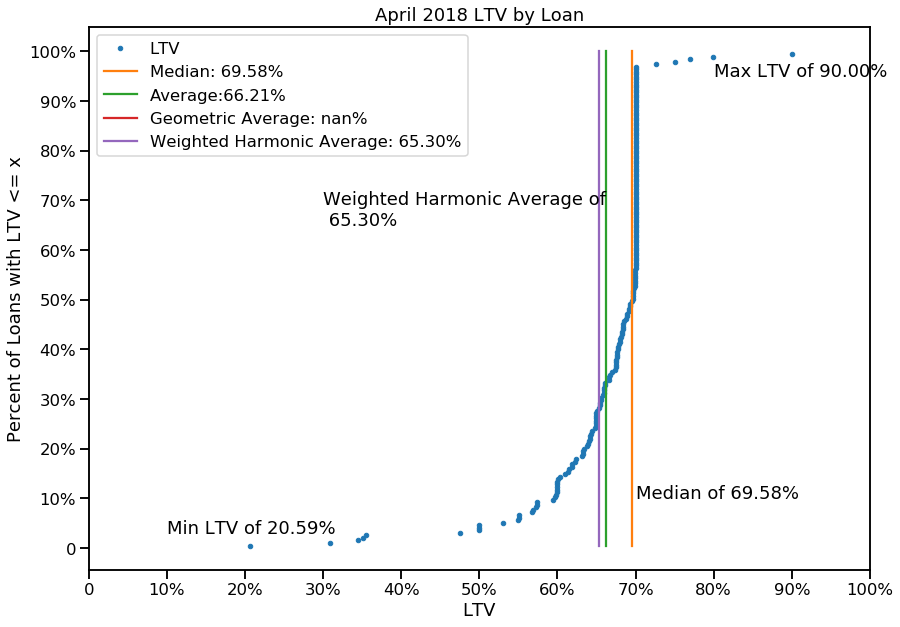

In [95]:
t = tape3.drop(['Loan Amount', 'ARV'], axis=1)
t.set_index('x', inplace=True)
sns.set_context('talk')

med = 'Median of {0:.2f}%'.format(t.med_ltv.mean() * 100)
whm = 'Weighted Harmonic Average of\n {0:.2f}%'.format(t.hmean_ltv.mean() * 100)
maxltv = 'Max LTV of {0:.2f}%'.format(t.LTV.max() * 100)
minltv = 'Min LTV of {0:.2f}%'.format(t.LTV.min() * 100)

plt.figure(figsize=(14, 10))

plt.plot(t.index, t.y, label='LTV', marker='.', linestyle='none')
plt.plot(t.med_ltv, t.y, label='Median: {0:.2f}%'.format(t.med_ltv.max()*100))
plt.plot(t.avg_ltv, t.y, label='Average:{0:.2f}%'.format(t.avg_ltv.max()*100))
plt.plot(t.gmean_ltv, t.y, label='Geometric Average: {0:.2f}%'.format(t.gmean_ltv.max()*100))
plt.plot(t.hmean_ltv, t.y, label='Weighted Harmonic Average: {0:.2f}%'.format(t.hmean_ltv.max()*100))
plt.title('April 2018 LTV by Loan')
plt.legend()
plt.annotate(med, xy=[.7, .1])
plt.annotate(whm, xy=[.3, .65])
plt.annotate(minltv, xy=[.1, .03])
plt.annotate(maxltv, xy=[.8, .95])
plt.xticks(np.arange(0,1.1,0.1), ['0', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.yticks(np.arange(0,1.1,0.1), ['0', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.ylabel('Percent of Loans with LTV <= x')
plt.xlabel('LTV')

plt.show()

In [96]:
t.LTV[t['LTV'] == .7].count() / t.LTV.count()

0.41237113402061853

$$LTV_{WHM} = \frac{\displaystyle\sum_{i=1}^{N}w_i}{\displaystyle\sum_{i=1}^{N}{\left[w_i \cdot \frac{LV}{ARV}\right]}} =  \frac{\displaystyle\sum_{i=1}^{N}\left[LV_i\right]}{\displaystyle\sum_{i=1}^{N}\left[ARV_i\right]} $$


In [97]:
hmtape = tape3.drop(['LTV', 'avg_ltv', 'med_ltv', 'gmean_ltv', 'hmean_ltv', 'x', 'y'], axis=1)
hmtape.columns = ['LA', 'ARV']
hmtape.head()

,LA,ARV
7,65000.0,105000.0
12,714000.0,1190000.0
17,710000.0,1290000.0
29,780000.0,1200000.0
36,780000.0,1190000.0


In [98]:
hmtape['LTV'] = hmtape.LA / hmtape.ARV
hmtape['w'] = hmtape.LA / hmtape.LA.sum()
hmtape['wLTV'] = hmtape.LTV * hmtape.w
hmtape['recipLTV'] = hmtape.ARV / hmtape.LA
hmtape['wrecip'] = hmtape.w * hmtape.recipLTV

hmtape.head()

,LA,ARV,LTV,w,wLTV,recipLTV,wrecip
7,65000.0,105000.0,0.619048,0.000217,0.000134,1.615385,0.000350
12,714000.0,1190000.0,0.600000,0.002381,0.001429,1.666667,0.003969
17,710000.0,1290000.0,0.550388,0.002368,0.001303,1.816901,0.004302
29,780000.0,1200000.0,0.650000,0.002601,0.001691,1.538462,0.004002
36,780000.0,1190000.0,0.655462,0.002601,0.001705,1.525641,0.003969


In [99]:
hmtape.w.sum() / hmtape.wrecip.sum()

0.652955456403506

In [100]:
hmtape.LA.sum() / hmtape.ARV.sum()

0.6529554564035062